# German Sign Classification
The aim of the project is to classify various road signs into correct categories.

### 1. Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
train_path = '../Dataset/Train'
data_dir = '../Dataset'
test_path = '../Dataset/Test'

# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

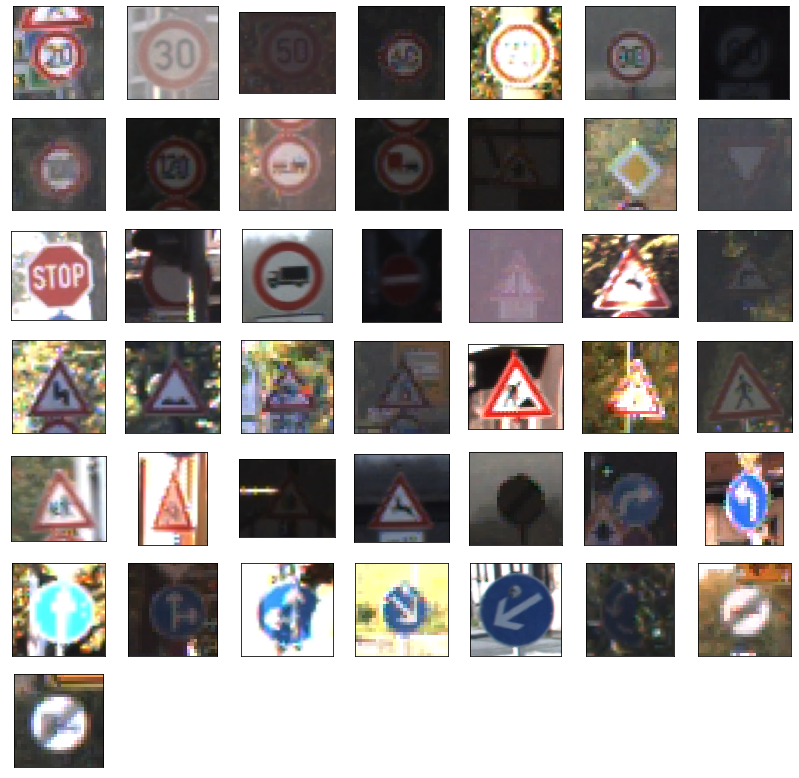

In [3]:
# Showing the first image of each category
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign)
    plt.imshow(img)
plt.show()

Text(0, 0.5, 'No. of images')

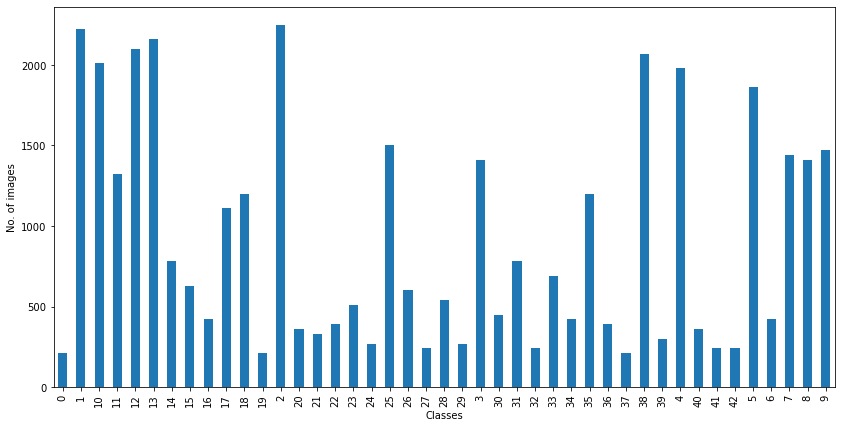

In [4]:
# The number of images in each category
datadic = {}
for folder in os.listdir(train_path):
    datadic[folder] = len(os.listdir(train_path + '/' + folder))

data_df = pd.Series(datadic)
plt.figure(figsize=(14,7))
data_df.plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('No. of images')

### 2. Preparing the data for the model

In [5]:
# Function to load the images and labels into two lists
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    return images, labels

In [6]:
images, labels = load_data(train_path)
labels = to_categorical(labels)

In [7]:
# Split into training and validation data
x_train, x_val, y_train, y_val = train_test_split(np.array(images), labels, test_size=0.2)
x_train/=255
x_val/=255

In [8]:
x_train

array([[[[0.07843138, 0.08235294, 0.09019608],
         [0.09803922, 0.09803922, 0.10196079],
         [0.10588235, 0.09019608, 0.09803922],
         ...,
         [0.07450981, 0.07058824, 0.07843138],
         [0.07058824, 0.0627451 , 0.07058824],
         [0.07058824, 0.0627451 , 0.07058824]],

        [[0.06666667, 0.07450981, 0.08627451],
         [0.09411765, 0.09411765, 0.10588235],
         [0.09803922, 0.08627451, 0.09411765],
         ...,
         [0.06666667, 0.06666667, 0.07450981],
         [0.07058824, 0.05882353, 0.06666667],
         [0.0627451 , 0.05882353, 0.07058824]],

        [[0.07058824, 0.07058824, 0.07450981],
         [0.09411765, 0.09019608, 0.09411765],
         [0.09411765, 0.08235294, 0.08627451],
         ...,
         [0.07843138, 0.07450981, 0.08235294],
         [0.06666667, 0.05882353, 0.07058824],
         [0.0627451 , 0.0627451 , 0.07843138]],

        ...,

        [[0.04313726, 0.03921569, 0.05098039],
         [0.04313726, 0.04313726, 0.05490196]

In [9]:
print('x_train shape:',x_train.shape)
print('Number of images in x_train: ',x_train.shape[0])
print('x_val shape:', x_val.shape)
print('Number of images in x_val: ',x_val.shape[0])

x_train shape: (31367, 30, 30, 3)
Number of images in x_train:  31367
x_val shape: (7842, 30, 30, 3)
Number of images in x_val:  7842


### 3. Building the model

In [10]:
model = models.Sequential()

# Input layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 1st hidden layer
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 2nd hidden layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Flattening
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

#Softmax layer for output
model.add(Dense(NUM_CATEGORIES,activation='softmax'))

learn_rate = 0.001
epochs = 30

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          7

In [12]:
# Fit the model on the training and validation data
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

Epoch 1/20
981/981 [==============================] - 37s 32ms/step - loss: 2.3606 - accuracy: 0.3594 - val_loss: 0.4442 - val_accuracy: 0.8629
Epoch 2/20
981/981 [==============================] - 30s 31ms/step - loss: 0.3981 - accuracy: 0.8791 - val_loss: 0.1774 - val_accuracy: 0.9473
Epoch 3/20
981/981 [==============================] - 30s 31ms/step - loss: 0.2071 - accuracy: 0.9355 - val_loss: 0.1066 - val_accuracy: 0.9723
Epoch 4/20
981/981 [==============================] - 31s 31ms/step - loss: 0.1327 - accuracy: 0.9602 - val_loss: 0.0826 - val_accuracy: 0.9769
Epoch 5/20
981/981 [==============================] - 31s 31ms/step - loss: 0.1015 - accuracy: 0.9682 - val_loss: 0.0818 - val_accuracy: 0.9781
Epoch 6/20
981/981 [==============================] - 31s 32ms/step - loss: 0.0802 - accuracy: 0.9750 - val_loss: 0.0780 - val_accuracy: 0.9754
Epoch 7/20
981/981 [==============================] - 31s 32ms/step - loss: 0.0685 - accuracy: 0.9793 - val_loss: 0.0691 - val_accuracy:

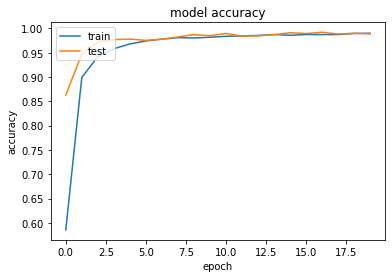

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Observations:
- A Dropout rate of 0.25 in each layer of the model gave a higher accuracy than at 0.3.
- The val_accuracy peaks in the 19th epoch.

## Running the model on Test image

### Loading the test image

In [14]:
test_img = load_img(os.path.join(test_path,'00000.png'), target_size=(30, 30))

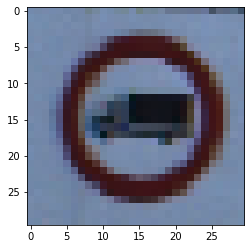

In [15]:
plt.imshow(test_img)

### Category classification of test image

In [18]:
n = np.array(test_img)
img_arr = n.reshape(1, 30, 30, 3)
y_pred = model.predict(img_arr).argmax()
print("The predicted category of the test image is:", y_pred)

The predicted category of the test image is: 16


Checking the predicted category in the Training set

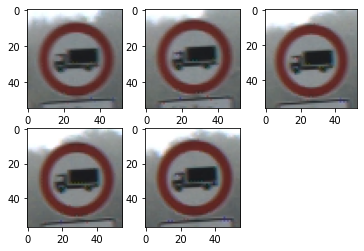

In [17]:
category_path = os.path.join(train_path, str(y_pred))

# Display the first 5 images in the category decided by the model in the training set to verify
for i, file in enumerate(os.listdir(category_path)[0:5]):
    fullpath = category_path + "/" + file
    img=load_img(fullpath)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)

### Conclusions:
- The model accurately classifies the test image in the correct category as seen above.
- The model gave an accuracy of 99.16% after 20 epochs.